# Preliminary  assessment of Plane of Array irradiance measurements against theoretical sun path
The algorithm hereby described flags possible disconnections and outliers of thermoelectric pyranometer hourly
spot measurements corresponding to the lowest class of monitoring by comparing them to the theoretical sun path.

## Sun position algorithm
The theoretical sun path is obtained through the widely used NREL algorithm.
This algorithm is implemented by SNL in the [python library pvlib](https://github.com/pvlib/pvlib-python/tree/master/pvlib).

In [105]:
from pandas import DataFrame, Series, DatetimeIndex, merge, set_option
from pvlib import spa as spnrel
from clear_sky import datetime_to_utc
from datetime import datetime
from os import getcwd, listdir
from os.path import join, dirname

set_option('display.max_columns', 10)

#Module position is retrieved through [digimap](#https://digimap.edina.ac.uk/)
LATITUDE = 52.7616
#negative longitude based on solar convention
LONGITUDE =  - (1.2406)
ALTITUDE = 79
PRESSURE = 101325.
TEMPERATURE = 12
DELTA_T = 67.0
ATMOS_REFRACT = 0.5667
TRANSMITTANCE = 0.5

SURFACE_ZENITH = 34
SURFACE_AZIMUTH = 180

NUMTHREADS = 4

ASSETS_FOLDER = join(dirname(getcwd()) + r"/assets/")


delta_t = DELTA_T
observer_longitude = LONGITUDE
observer_latitude = LATITUDE
observer_elevation = ALTITUDE
local_pressure =PRESSURE
local_temp = TEMPERATURE
atmos_refract = ATMOS_REFRACT
numthreads = NUMTHREADS

### SPA calculation example

In [ ]:
year, month, day, hour, minute, second, microsecond = 2019, 4, 16, 12, 0, 0, 0
unixtime = datetime_to_utc(datetime(year, month, day, hour, minute, second, microsecond))
julian_day_dt = spnrel.julian_day_dt(year, month, day, hour, minute, second, microsecond)
julian_day_dt

In [ ]:
julian_day = spnrel.julian_day(unixtime)
julian_day

In [ ]:
julian_ephemeris_day = spnrel.julian_ephemeris_day(julian_day, delta_t)
julian_ephemeris_day

In [ ]:
julian_century = spnrel.julian_century(julian_day)
julian_century

In [ ]:
julian_ephemeris_century = spnrel.julian_ephemeris_century(julian_ephemeris_day)
julian_ephemeris_century

In [ ]:
julian_ephemeris_millennium = spnrel.julian_ephemeris_millennium(julian_ephemeris_century)
julian_ephemeris_millennium

In [ ]:
#renaming
jme = julian_ephemeris_millennium
heliocentric_longitude = spnrel.heliocentric_longitude(jme)
heliocentric_longitude

In [ ]:
heliocentric_latitude = spnrel.heliocentric_latitude(jme)
heliocentric_latitude

In [ ]:
heliocentric_radius_vector= spnrel.heliocentric_radius_vector(jme)
heliocentric_radius_vector

In [ ]:
geocentric_longitude = spnrel.geocentric_longitude(heliocentric_longitude)
geocentric_longitude

In [ ]:
geocentric_latitude = spnrel.geocentric_latitude(heliocentric_latitude)
geocentric_latitude

In [ ]:
mean_elongation = spnrel.mean_elongation(julian_ephemeris_century)
mean_elongation

In [ ]:
mean_anomaly_sun = spnrel.mean_anomaly_sun(julian_ephemeris_century)
mean_anomaly_sun

In [ ]:
mean_anomaly_moon = spnrel.mean_anomaly_moon(julian_ephemeris_century)
mean_anomaly_moon

In [ ]:
moon_argument_latitude = spnrel.moon_argument_latitude(julian_ephemeris_century)
moon_argument_latitude

In [ ]:
moon_ascending_longitude = spnrel.moon_ascending_longitude(julian_ephemeris_century)
moon_ascending_longitude

In [ ]:
#TBC
x0, x1, x2, x3, x4 = mean_elongation, mean_anomaly_sun, mean_anomaly_moon, moon_argument_latitude, moon_ascending_longitude
longitude_nutation = spnrel.longitude_nutation(julian_ephemeris_century, x0, x1, x2, x3, x4)
longitude_nutation

In [ ]:
obliquity_nutation = spnrel.obliquity_nutation(julian_ephemeris_century, x0, x1, x2, x3, x4)
obliquity_nutation

In [ ]:
mean_ecliptic_obliquity = spnrel.mean_ecliptic_obliquity(julian_ephemeris_millennium)
mean_ecliptic_obliquity

In [ ]:
true_ecliptic_obliquity = spnrel.true_ecliptic_obliquity(mean_ecliptic_obliquity, obliquity_nutation)
true_ecliptic_obliquity

In [22]:
#TBC renaming
earth_radius_vector=heliocentric_radius_vector
aberration_correction = spnrel.aberration_correction(earth_radius_vector)
aberration_correction

-0.005671989558637529

In [23]:
apparent_sun_longitude = spnrel.apparent_sun_longitude(geocentric_longitude, longitude_nutation, aberration_correction)
apparent_sun_longitude

26.216447430291836

In [24]:
mean_sidereal_time = spnrel.mean_sidereal_time(julian_day, julian_century)
mean_sidereal_time

24.34632831532508

In [25]:
apparent_sidereal_time = spnrel.apparent_sidereal_time(mean_sidereal_time, longitude_nutation, true_ecliptic_obliquity)
apparent_sidereal_time

24.342033968779937

In [26]:
geocentric_sun_right_ascension = spnrel.geocentric_sun_right_ascension(apparent_sun_longitude, true_ecliptic_obliquity,
                                   geocentric_latitude)
geocentric_sun_right_ascension

24.31319035809793

In [27]:
geocentric_sun_declination = spnrel.geocentric_sun_declination(apparent_sun_longitude, true_ecliptic_obliquity,
                               geocentric_latitude)
geocentric_sun_declination

10.119534241416368

In [28]:
#renaming
sun_right_ascension=geocentric_sun_right_ascension
local_hour_angle = spnrel.local_hour_angle(apparent_sidereal_time, observer_longitude,
                     sun_right_ascension)
local_hour_angle

358.788243610682

In [29]:
equatorial_horizontal_parallax = spnrel.equatorial_horizontal_parallax(earth_radius_vector)
equatorial_horizontal_parallax

0.0024343564202021707

In [30]:
uterm = spnrel.uterm(observer_latitude)
uterm

0.9192449468406798

In [31]:
#renaming
u = uterm
xterm = spnrel.xterm(u, observer_latitude, observer_elevation)
xterm

0.6064282006215796

In [32]:
yterm = spnrel.yterm(u, observer_latitude, observer_elevation)
yterm

0.7924878610678376

In [33]:
parallax_sun_right_ascension = spnrel.parallax_sun_right_ascension(xterm, equatorial_horizontal_parallax,
                                 local_hour_angle, geocentric_sun_declination)
parallax_sun_right_ascension

3.171352413077448e-05

In [34]:
topocentric_sun_right_ascension = spnrel.topocentric_sun_right_ascension(geocentric_sun_right_ascension,
                                    parallax_sun_right_ascension)
topocentric_sun_right_ascension

24.31322207162206

In [35]:
topocentric_sun_declination = spnrel.topocentric_sun_declination(
                            geocentric_sun_declination,
                            xterm,
                            yterm,
                            equatorial_horizontal_parallax,
                            parallax_sun_right_ascension,
                            local_hour_angle)
topocentric_sun_declination

10.117894328894177

In [36]:
topocentric_local_hour_angle = spnrel.topocentric_local_hour_angle(local_hour_angle,
                                 parallax_sun_right_ascension)
topocentric_local_hour_angle

358.78821189715785

In [37]:
topocentric_elevation_angle_without_atmosphere = spnrel.topocentric_elevation_angle_without_atmosphere(observer_latitude,
                                                   topocentric_sun_declination,
                                                   topocentric_local_hour_angle
                                                   )
topocentric_elevation_angle_without_atmosphere

47.34502721330034

In [38]:
#renaming
topocentric_elevation_angle_wo_atmosphere = topocentric_elevation_angle_without_atmosphere
topocentric_elevation_angle_wo_atmosphere

47.34502721330034

In [39]:
atmospheric_refraction_correction = spnrel.atmospheric_refraction_correction(local_pressure, local_temp,
                                      topocentric_elevation_angle_wo_atmosphere, atmos_refract)
atmospheric_refraction_correction

1.549559872578202

In [40]:
topocentric_elevation_angle = spnrel.topocentric_elevation_angle(
                                topocentric_elevation_angle_without_atmosphere,
                                atmospheric_refraction_correction)
topocentric_elevation_angle

48.89458708587854

In [41]:
topocentric_elevation_angle = spnrel.topocentric_zenith_angle(topocentric_elevation_angle)
topocentric_elevation_angle

41.10541291412146

In [42]:
topocentric_astronomers_azimuth = spnrel.topocentric_astronomers_azimuth(topocentric_local_hour_angle,
                                    topocentric_sun_declination,
                                    observer_latitude)
topocentric_astronomers_azimuth

358.2392657915521

In [43]:
topocentric_azimuth_angle = spnrel.topocentric_azimuth_angle(topocentric_astronomers_azimuth)
topocentric_azimuth_angle

178.23926579155204

In [44]:
sun_mean_longitude = spnrel.sun_mean_longitude(julian_ephemeris_millennium)
sun_mean_longitude

7224.352884244311

In [45]:
equation_of_time = spnrel.equation_of_time(sun_mean_longitude, geocentric_sun_right_ascension,
                     longitude_nutation, true_ecliptic_obliquity)
equation_of_time

0.1187249586728285

In [46]:
#solar_position_numpy
#renaming
lat = observer_latitude
lon = observer_longitude
elev = observer_elevation
pressure = local_pressure
temp = local_temp
# Calculate the solar position assuming unixtime is a numpy array
theta, theta0, e, e0, phi, eot = spnrel.solar_position_numpy(unixtime, lat, lon, elev, pressure, temp, delta_t,
                         atmos_refract, numthreads, sst=False, esd=False)
#topocentric_zenith_angle
theta

41.10541291412146

In [47]:
#topocentric_zenith_angle WITHOUT atmospheric refraction correction
theta0

42.65497278669966

In [48]:
#topocentric_elevation_angle
e

48.89458708587854

In [49]:
#topocentric_elevation_angle WITHOUT atmospheric refraction correction
e0

47.34502721330034

In [50]:
#topocentric_azimuth_angle
phi

178.23926579155204

In [51]:
#equation_of_time
eot

0.1187249586728285

### Comparison between CREST solar position algorithm (no atmosphere correction) and python implementation

In [52]:
from clear_sky import SolarLibrary
from clear_sky import csv_read_datetime_format

crest_spa, errors = csv_read_datetime_format(filepath=join(ASSETS_FOLDER,'crest_nrel_spa.csv'),
                                     datetime_column="SPA_Datetime")
#surface zenith & azimuth not used at this point but later
sl = SolarLibrary(latitude=LATITUDE, longitude=LONGITUDE, altitude=ALTITUDE,
                 temperature=TEMPERATURE, delta_t=DELTA_T, pressure=PRESSURE,
                  surface_zenith=SURFACE_ZENITH, surface_azimuth=SURFACE_AZIMUTH,
                  atmos_refract=ATMOS_REFRACT, transmittance=TRANSMITTANCE)
outputs = ["apparentzenith","zenith","azimuth","equation_of_time", "elevation", "apparentelevation"]

In [53]:
#DEV NOTE 1/3/21: elevation not showed but calculated
sl._outputs

['extraradiation',
 'airmassabsolute',
 'irradiancebeam',
 'zenith',
 'irradiancetotal',
 'dayofyear',
 'irradiancediffuseskypoa',
 'azimuth',
 'apparentelevation',
 'angleofincidenceprojection',
 'linketurbidity',
 'angleofincidence',
 'apparentzenith',
 'irradiancediffusegroundpoa',
 'irradiancediffuse',
 'irradiancetotalpoa',
 'irradiancediffusepoa',
 'irradiancebeampoa',
 'equation_of_time',
 'airmassrelative',
 'elevation']

In [54]:
spa_outputs = sl.getsolardataframe(datetimeindex_utc=DatetimeIndex(crest_spa["SPA_Datetime"]), outputs=outputs)

In [55]:
comparison = merge(crest_spa, spa_outputs, left_on="SPA_Datetime", right_on="SPA_Datetime", suffixes=("_crest", "_nrel"))
comparison.iloc[[0,3,6,9,12,15,18,21],:]

,SPA_Datetime,Declination,Elevation,ZenithAngle,Azimuth,...,apparentzenith,zenith,azimuth,apparentelevation,elevation
0,2019-04-16 00:00:00,9.940,-27.324,117.324,178.624,...,117.289659,117.289659,358.623840,-27.289659,-27.289659
3,2019-04-16 00:03:00,9.940,-27.331,117.331,179.455,...,117.296526,117.296526,359.455209,-27.296526,-27.296526
6,2019-04-16 00:06:00,9.941,-27.332,117.332,-179.713,...,117.296807,117.296807,0.286640,-27.296807,-27.296807
9,2019-04-16 00:09:00,9.942,-27.325,117.325,-178.882,...,117.290501,117.290501,1.118016,-27.290501,-27.290501
12,2019-04-16 00:12:00,9.943,-27.312,117.312,-178.051,...,117.277611,117.277611,1.949221,-27.277611,-27.277611
15,2019-04-16 00:15:00,9.943,-27.293,117.293,-177.220,...,117.258142,117.258142,2.780142,-27.258142,-27.258142
18,2019-04-16 00:18:00,9.944,-27.267,117.267,-176.389,...,117.232098,117.232098,3.610663,-27.232098,-27.232098
21,2019-04-16 00:21:00,9.945,-27.234,117.234,-175.559,...,117.199491,117.199491,4.440670,-27.199491,-27.199491


## Example of clear sky days

## Clear sky days
Examples of clear sky day are previously identified to be used as comparison later: 14/2/19, 21/4/19, 29/6/19, 29/6/19
and 29/11/19.

In [56]:
#importing additional libraries for clear sky identification
from database_operations import DatabaseEngine
from data_operations import csv_read_datetime_format, get_min_max_by_date
from clear_sky import SolarLibrary
import matplotlib.pyplot as plt

## Comparison of hourly spot PoA irradiance measurements against clear sky path
No disconnection issues are found. For each date 24 hourly spot measurements are available and no null values are found.
Daily measurements start at 0:00 and end at 23:00.
Maximum second derivative (corresponding to first and last ray of sun on the sensor) are distributed during the day,
thus a comparison with theoretical sun path is required to assess them.

### Calculating first and last ray on the sensor

In [103]:
ISC_IRRADIANCE_FILES_FOLDER = join(dirname(getcwd())+r"/assets/isc_irradiance_files/")
gpoa, errors = csv_read_datetime_format(filepath_or_buffer=join(ISC_IRRADIANCE_FILES_FOLDER,'chpoa_y19.csv'),
                                     datetime_column="date_trunc")

In [ ]:
filenames = [f for f in listdir(ISC_IRRADIANCE_FILES_FOLDER) if f.endswith(r".csv") and f.startswith(r"chpoa_y")]
gpoa = DataFrame()

for f in filenames:
    gpoa_y, errors = csv_read_datetime_format(filepath=join(ISC_IRRADIANCE_FILES_FOLDER, f),
                                     datetime_column="date_trunc")
    gpoa = gpoa.append(gpoa_y, ignore_index=True)

In [115]:
gpoa.sort_values(by='tmstamp', inplace=True)

In [116]:
gpoa_dly = get_min_max_by_date(values= Series(gpoa.g_cmp11_ppuk.values, index = gpoa.date_trunc.values))
#overview of first and last sun ray on the sensor
gpoa_dly.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,len,null,hour_min,hour_value_2d_max_morning,value_2d_max_morning,hour_value_max,value_max,hour_value_2d_max_afternoon,value_2d_max_afternoon,hour_max
count,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1459.000000
mean,23.973269,0.0,0.006854,9.866347,385.833160,11.965045,658.603500,14.043210,404.604124,22.991775
std,0.444412,0.0,0.261802,1.873382,353.404237,1.493290,359.145807,1.748865,369.525249,0.289151
min,13.000000,0.0,0.000000,2.000000,-171.704000,7.000000,11.477000,12.000000,3.864000,12.000000
5%,24.000000,0.0,0.000000,6.000000,28.135700,9.900000,80.000300,12.000000,28.943100,23.000000
25%,24.000000,0.0,0.000000,9.000000,124.773500,11.000000,325.682000,13.000000,127.641750,23.000000
50%,24.000000,0.0,0.000000,10.000000,270.454000,12.000000,687.614000,14.000000,293.295000,23.000000
75%,24.000000,0.0,0.000000,11.000000,557.897000,13.000000,983.523000,15.000000,578.579000,23.000000
95%,24.000000,0.0,0.000000,12.000000,1105.875500,15.000000,1162.500000,18.000000,1195.312100,23.000000
max,24.000000,0.0,10.000000,12.000000,2099.999000,17.000000,1500.000000,19.000000,2099.999000,23.000000


In [117]:
gpoa_dly.rename(columns={'hour_value_2d_max_morning':'hour_first_ray', 'hour_value_2d_max_afternoon': 'hour_last_ray'},
                inplace=True)
#checking columns renamed
gpoa_dly.columns

Index(['date', 'len', 'null', 'hour_min', 'hour_first_ray',
       'value_2d_max_morning', 'hour_value_max', 'value_max', 'hour_last_ray',
       'value_2d_max_afternoon', 'hour_max'],
      dtype='object')

## Comparison of first and last ray against clear sky path

In [2]:
cs_dly = sl.getsuninout(utc= gpoa.date_trunc, freq= "H")

NameError: name 'sl' is not defined

In [119]:
# extracting hour
cs_dly.loc[:, 'hour_sun_on'] = cs_dly.loc[:, 'sun_on'].apply(lambda x: x.hour)
cs_dly.loc[:, 'hour_sun_off'] = cs_dly.loc[:, 'sun_off'].apply(lambda x: x.hour)

In [120]:
# extractin first and last ray as well as max from gpoa dataframe
gpoa_cs_dly = gpoa_dly.copy(deep=True).loc[:,['hour_first_ray', 'hour_value_max', 'hour_last_ray']]

In [121]:
# merge the two df for comparison
gpoa_cs_dly = gpoa_cs_dly.merge(cs_dly.loc[:, ['hour_sun_on','hour_sun_off']], how='inner', left_index=True, right_index=True)

In [122]:
# calculating delay of parameters from theoretical sun path
gpoa_cs_dly["delay_first_ray"] = gpoa_cs_dly["hour_first_ray"] - gpoa_cs_dly["hour_sun_on"]
gpoa_cs_dly["delay_max_ray"] = gpoa_cs_dly["hour_value_max"] - 12
gpoa_cs_dly["delay_last_ray"] = gpoa_cs_dly["hour_last_ray"] - gpoa_cs_dly["hour_sun_off"]

In [123]:
gpoa_cs_dly.describe()

,hour_first_ray,hour_value_max,hour_last_ray,hour_sun_on,hour_sun_off,delay_first_ray,delay_max_ray,delay_last_ray
count,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000
mean,9.866347,11.965045,14.043210,6.495545,17.603838,3.370802,-0.034955,-3.561043
std,1.873382,1.493290,1.748865,0.500152,0.489266,1.909186,1.493290,1.755288
min,2.000000,7.000000,12.000000,6.000000,17.000000,-5.000000,-5.000000,-6.000000
25%,9.000000,11.000000,13.000000,6.000000,17.000000,2.000000,-1.000000,-5.000000
50%,10.000000,12.000000,14.000000,6.000000,18.000000,4.000000,0.000000,-4.000000
75%,11.000000,13.000000,15.000000,7.000000,18.000000,5.000000,1.000000,-2.000000
max,12.000000,17.000000,19.000000,7.000000,18.000000,6.000000,5.000000,1.000000


In [165]:
#identifying dates of clear sky candidates
cs_candidate_days = gpoa_cs_dly.loc[(gpoa_cs_dly.delay_first_ray==0) & (gpoa_cs_dly.delay_last_ray==0) & (gpoa_cs_dly.delay_max_ray==0),:].index.to_list()
print(cs_candidate_days)

[datetime.date(2017, 3, 15), datetime.date(2017, 4, 8), datetime.date(2017, 5, 10), datetime.date(2017, 8, 28), datetime.date(2018, 4, 19), datetime.date(2018, 5, 6), datetime.date(2018, 5, 7), datetime.date(2018, 6, 30), datetime.date(2018, 8, 9), datetime.date(2018, 9, 29), datetime.date(2018, 10, 9), datetime.date(2018, 10, 22), datetime.date(2019, 4, 19), datetime.date(2019, 4, 21), datetime.date(2019, 8, 26), datetime.date(2019, 9, 13), datetime.date(2019, 9, 21), datetime.date(2020, 3, 24), datetime.date(2020, 4, 11), datetime.date(2020, 4, 14), datetime.date(2020, 4, 20), datetime.date(2020, 4, 21), datetime.date(2020, 5, 28), datetime.date(2020, 9, 14), datetime.date(2020, 9, 21)]


In [156]:
#manually indentified cs days tb
cs_manual_days = [datetime(2019,2,14), datetime(2019,4,19), datetime(2019,6,29), datetime(2019,11,29)]

In [133]:
gpoa["date"] = DatetimeIndex(gpoa.date_trunc).date

In [137]:
gpoa_cds = gpoa.loc[gpoa.date.isin(cs_candidate_days),['tmstamp','date_trunc','g_cmp11_ppuk','date']]
#specifying index
gpoa_cds.index = DatetimeIndex(gpoa_cds.tmstamp)

In [138]:
sl.clear_sky_model = 'liujordan'
# klucher1979
print(sl.clear_sky_model, sl.poa_model)
df_solar = sl.getsolardataframe(DatetimeIndex(gpoa_cds.tmstamp), outputs=["irradiancetotalpoa"])
gpoa_cds.loc[:, 'liujordan_perez'] = df_solar.loc[:, "irradiancetotalpoa"]
sl.poa_model = 'klucher1979'
print(sl.clear_sky_model, sl.poa_model)
df_solar = sl.getsolardataframe(DatetimeIndex(gpoa_cds.tmstamp), outputs=["irradiancetotalpoa"], solardataframe=df_solar)
gpoa_cds.loc[:, 'liujordan_klucher'] = df_solar.loc[:, "irradiancetotalpoa"]
sl.clear_sky_model = 'ineichenperez'
print(sl.clear_sky_model, sl.poa_model)
df_solar = sl.getsolardataframe(DatetimeIndex(gpoa_cds.tmstamp), outputs=["irradiancetotalpoa"], solardataframe=df_solar)
gpoa_cds.loc[:, 'ineichenperez_klucher'] = df_solar.loc[:, "irradiancetotalpoa"]
sl.poa_model = 'perez'
print(sl.clear_sky_model, sl.poa_model)
df_solar = sl.getsolardataframe(DatetimeIndex(gpoa_cds.tmstamp), outputs=["irradiancetotalpoa"], solardataframe=df_solar)
gpoa_cds.loc[:, 'ineichenperez_perez'] = df_solar.loc[:, "irradiancetotalpoa"]

liujordan perez
liujordan klucher1979
ineichenperez klucher1979
ineichenperez perez


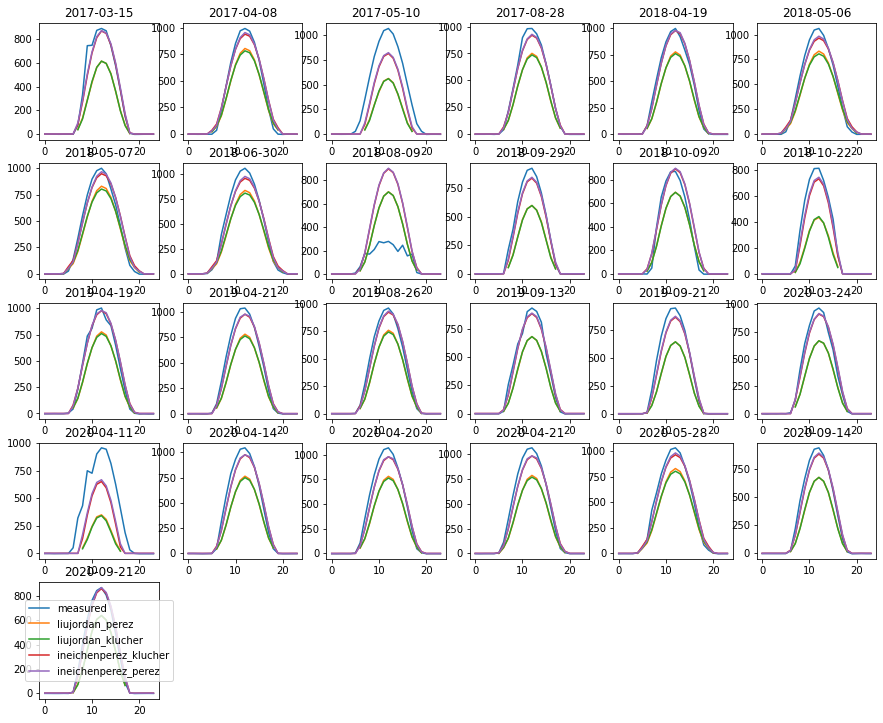

In [145]:
#legend and titles to be adjusted


#comparing measured values against different clear sky models
size = int(round(len(cs_candidate_days)**0.5, 0))+1
#gpoa["date"] = [dt.date() for dt in gpoa.date_trunc]
fig = plt.figure(figsize=(15,15))
i=1
for cd in cs_candidate_days:
    plt.subplot(size, size, i)
    gpoa_cd = gpoa_cds.loc[gpoa_cds.date==cd]
    plt.title(str(cd))
    plt.plot(DatetimeIndex(gpoa_cd.tmstamp).hour, gpoa_cd.g_cmp11_ppuk)
    cs_models = ['liujordan_perez', 'liujordan_klucher', 'ineichenperez_klucher', 'ineichenperez_perez']
    for cs_m in cs_models:
        plt.plot(DatetimeIndex(gpoa_cd.tmstamp).hour,gpoa_cd[cs_m])
    #plt.plot(DatetimeIndex(gpoa_cd.tmstamp).hour,
    #sl.getsolardataframe(gpoa_cd.tmstamp, outputs=["irradiancetotalpoa"])["irradiancetotalpoa"])
    legends = ["measured"] + cs_models
    i+=1
plt.legend(legends, loc="center") #best overlapping
plt.show()

In [100]:
#highest correlation confirmed by correlatio analysis
columns_correlation = cs_models + ["g_cmp11_ppuk"]
gpoa_cds.loc[:, columns_correlation].corr(method='pearson')

,liujordan_perez,liujordan_klucher,ineichenperez_klucher,ineichenperez_perez,g_cmp11_ppuk
liujordan_perez,1.000000,0.999801,0.994910,0.994256,0.980920
liujordan_klucher,0.999801,1.000000,0.995890,0.995220,0.981837
ineichenperez_klucher,0.994910,0.995890,1.000000,0.999967,0.994261
ineichenperez_perez,0.994256,0.995220,0.999967,1.000000,0.994412
g_cmp11_ppuk,0.980920,0.981837,0.994261,0.994412,1.000000


TMP

In [ ]:
cs_candidates = DataFrame(columns=['days','source'])
cs_candidates.days = cs_candidate_days
cs_candidates.source = 'fm'
for d in cs_manual_days:
    cs_candidates = cs_candidates.append({'days':str(d), 'source': 'tb'}, ignore_index=True)
cs_candidates
